In [45]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
from PIL import Image # converting images into arrays
%matplotlib inline

plt.style.use('default')

**<p style="color:red">EXERCISE 1</p>**

Create a bubble plot to analyze the immigration from Romania, Hungary and Bulgaria for the period 1980-2013. Make sure that:

* You specify a different color for each bubble trend e.g. blue, orange, green.
* Add a title to the plot.
* Add a title to each axis.
* Add a legend.

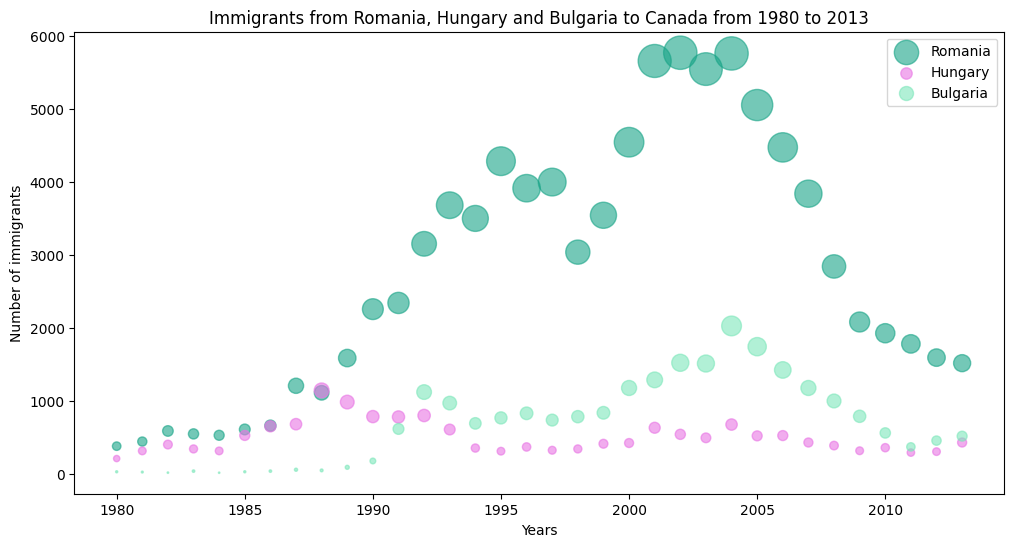

In [99]:
import random

# read dataset (second sheet, remove the first 20 rows from the sheet)
df = pd.read_excel('../datasets/Canada.xlsx',sheet_name=1, skiprows=range(20))
df.set_index('OdName', inplace=True) # set index as the country name

# remove redundant columns
df.drop(columns=['Type', 'Coverage', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName'], axis=1, inplace=True)

# Get only the necessary rows
countries = ['Romania', 'Hungary', 'Bulgaria']
df_rhb = df.loc[countries]
countries_data = df.loc[countries].T

# print(countries_data)


years = list(range(1980, 2014))
plt.figure(figsize=(12,6))
for country in countries:
    im_count = countries_data[country]
    color = (random.random(), random.random(), random.random())
    plt.scatter(years, im_count, s=im_count/10, alpha=0.6, color=color, label=country)

plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.title('Immigrants from Romania, Hungary and Bulgaria to Canada from 1980 to 2013')
plt.legend()
plt.show()



**<p style="color:red">EXERCISE 2</p>**

Create a waffle chart to analyze the immigration from Romania, Hungary and Bulgaria for the period 1980-2013.

Make use of both methods: 
1. The function `create_waffle_chart` which should be extended to `create_waffle_chart2` to ensure usage for any dataframe. The parameters of the new function should be restricted to: categories, values, colors, height, width. No print statements from the new function. The parameter *colors* is added in this version and represents a list of colours.
2. The `PyWaffle` package.

Make sure that:

* The chart has 40 X 20 tiles.
* Use the following colors for the chart: blue, orange, green (in both cases).
* Add a legend.

C:\Users\astal\AppData\Local\Temp\ipykernel_5024\524270665.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + '(' + str(values[i]) + ')'


<Figure size 640x480 with 0 Axes>

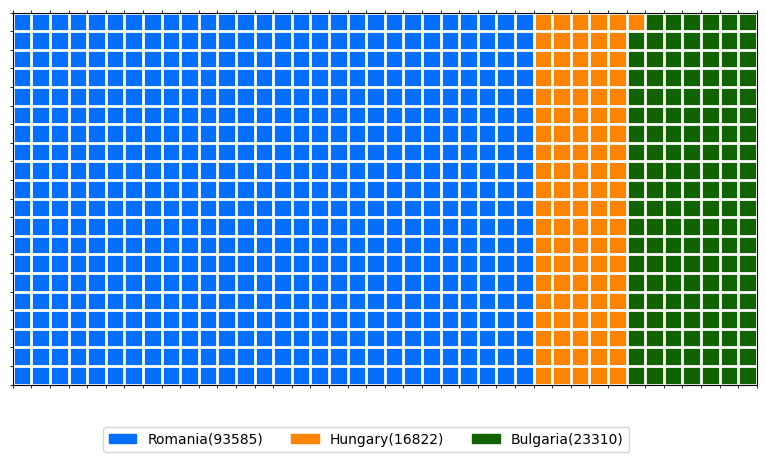

In [91]:
from matplotlib.colors import ListedColormap

def create_waffle_chart2(categories, values, colors, height, width):

    # proportions
    total_values = sum(values)
    category_proportions = [float(value) / total_values for value in values]

    # total number of tiles
    total_num_tiles = width * height

    # tiles per category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # init waffle chart
    waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    # populate waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
            waffle_chart[row, col] = category_index

    fig = plt.figure()
    colormap = ListedColormap(colors)
    plt.matshow(waffle_chart, cmap=colormap)

    ax = plt.gca()
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)


    plt.xticks([])
    plt.yticks([])

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        label_str = category + '(' + str(values[i]) + ')'
        legend_handles.append(mpatches.Patch(color=colors[i], label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()


df_rhb.drop(columns=['Total'], axis=1, inplace=True, errors='ignore')
df_rhb['Total'] = df_rhb.sum(axis=1, numeric_only=True) # will add the total column if exists already
categories = df_rhb.index.values
values = df_rhb['Total']

create_waffle_chart2(categories, values, ['#036ffc', '#fc8403', '#116300'], 20, 40)



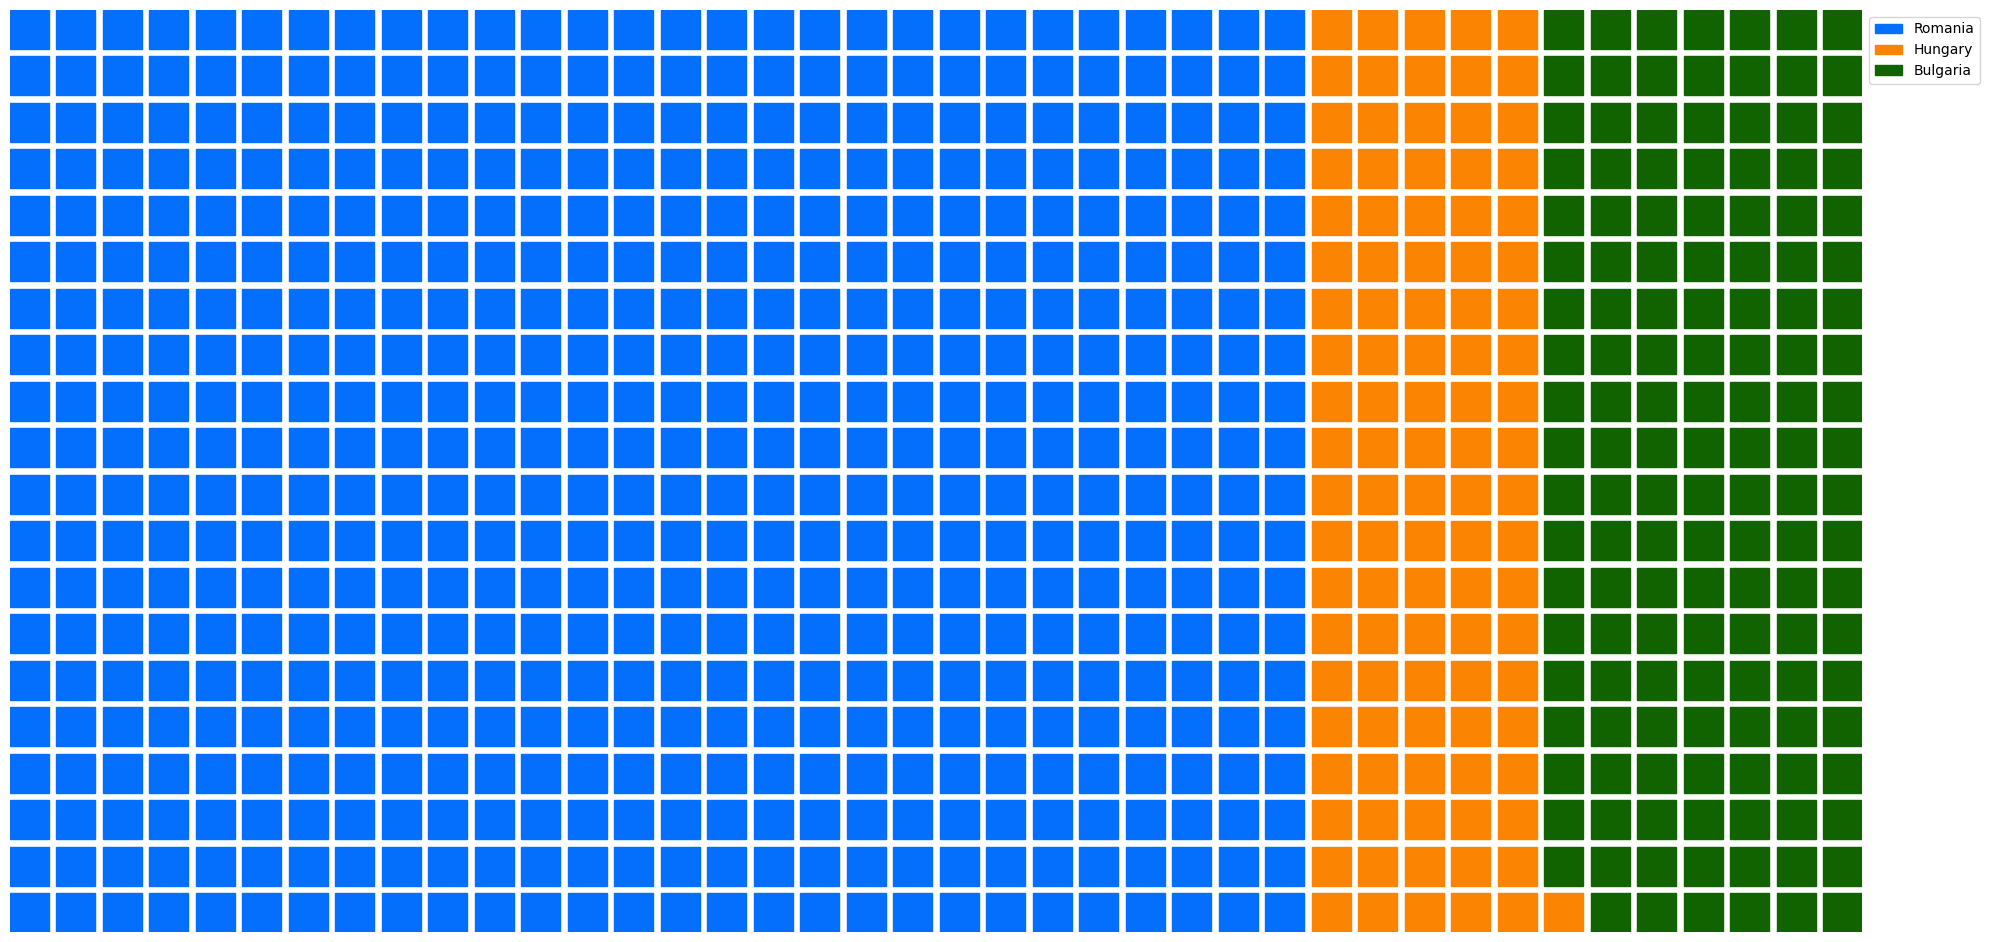

In [98]:
from pywaffle import Waffle

width = 40
height = 20

fig = plt.figure(
    FigureClass=Waffle,
    rows = height,
    columns = width,
    values = df_rhb['Total'],
    labels = list(countries),
    legend = {'loc' : 'upper left', 'bbox_to_anchor' : (1, 1)},
    colors = ['#036ffc', '#fc8403', '#116300'],
    figsize=(20, 12)
)
plt.show()

**<p style="color:red">EXERCISE 3</p>**

Create several word clouds to analyze the text from a book selected from https://www.gutenberg.org/browse/scores/top#authors-last30 (for example: Dracula by Bram Stoker, https://www.gutenberg.org/cache/epub/345/pg345.txt).

1. The first word cloud should be a simple one, using all words from the book and the default stop words.
2. The second word cloud should consider adding at least 3 new stop words (selected based on the first word cloud), have a figure size of (10,12) and use a specific colormap (select it from https://matplotlib.org/stable/tutorials/colors/colormaps.html).
3. The third word cloud should be generated using a mask. Find a mask picture file online, suitable for the selected book.

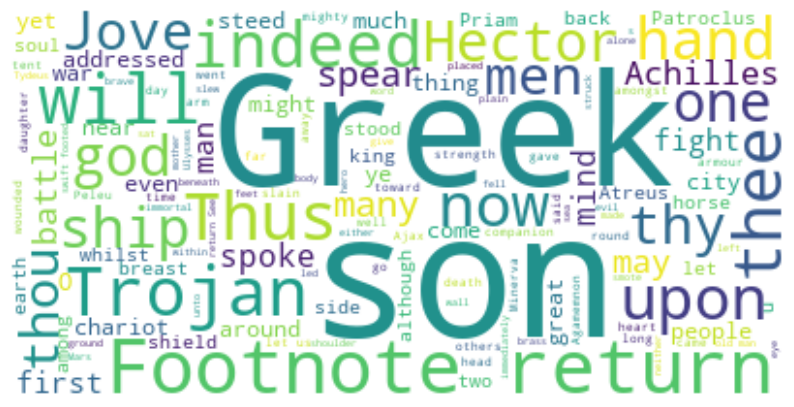

In [102]:
import urllib
from wordcloud import WordCloud, STOPWORDS

iliad = urllib.request.urlopen('https://www.gutenberg.org/cache/epub/22382/pg22382.txt').read().decode('utf-8')
stopwords = set(STOPWORDS)

wordcloud1 = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)
wordcloud1.generate(iliad)
fig = plt.figure(figsize=(10,14))

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

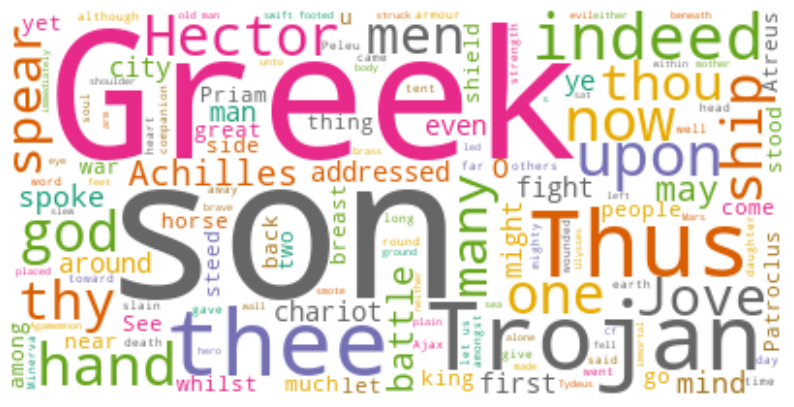

In [107]:
stopwords.add('Footnote')
stopwords.add('will')
stopwords.add('return')

wordcloud2 = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stopwords,
    colormap = 'Dark2'
)

wordcloud2.generate(iliad)
fig = plt.figure(figsize=(10,12))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

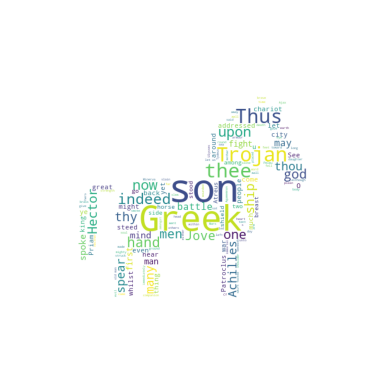

In [114]:
iliad_mask = np.array(Image.open(urllib.request.urlopen('https://img.freepik.com/premium-vector/trojan-horse-icon_404166-2046.jpg')))

wordcloud3 = WordCloud(
    background_color = 'white',
    max_words = 2000,
    mask = iliad_mask,
    stopwords = stopwords
)
wordcloud3.generate(iliad)

plt.imshow(wordcloud3)
plt.axis('off')
plt.show()